In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import struct
import subprocess
import sys

In [17]:
base_dir = "/Users/matteo/Documents/GitHub/SpatialAQP/test/skip"
exec_dir = "../.."
input_file = "skip_test.bin"
output_file = "skip.csv"

In [21]:
# Test the skip list construction.

ntrials = 5
nentries = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

os.chdir(base_dir)

outfile = open(output_file, 'w')

os.chdir(exec_dir)

for e in nentries:
    print('Testing e={}...'.format(e))
    input_file_path = "{}/{}".format(base_dir, input_file)
    time = 0
    for i in range(0, ntrials):
        p = subprocess.run(["java", "TestSkip", input_file_path, "1", str(e)], capture_output=True)
        lines = p.stdout.decode('utf-8').splitlines()
        time += int((lines[4].split(' '))[4])
    time /= ntrials
    outfile.write('{},{}\n'.format(e,time))
    
outfile.close()

os.chdir(base_dir)

Testing e=2...
Testing e=3...
Testing e=4...
Testing e=5...
Testing e=6...
Testing e=7...
Testing e=8...
Testing e=9...
Testing e=10...
Testing e=11...
Testing e=12...


In [3]:
pd.set_option("display.precision", 3)
df1 = pd.read_csv('skip.csv', header=None)
df1.columns = ['e', 'avg construction time']
df1.sort_values(ascending=True, by='e', inplace=True)
df1['avg construction time'] /= 1000000
df1

,e,avg construction time
0,2,0.003
1,3,0.005
2,4,0.007
3,5,0.010
4,6,0.016
5,7,0.025
6,8,0.043
7,9,0.078
8,10,0.148
9,11,0.317


In [4]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
  e &  avg construction time \\
\midrule
  2 &                  0.003 \\
  3 &                  0.005 \\
  4 &                  0.007 \\
  5 &                  0.010 \\
  6 &                  0.016 \\
  7 &                  0.025 \\
  8 &                  0.043 \\
  9 &                  0.078 \\
 10 &                  0.148 \\
 11 &                  0.317 \\
 12 &                  0.584 \\
\bottomrule
\end{tabular}



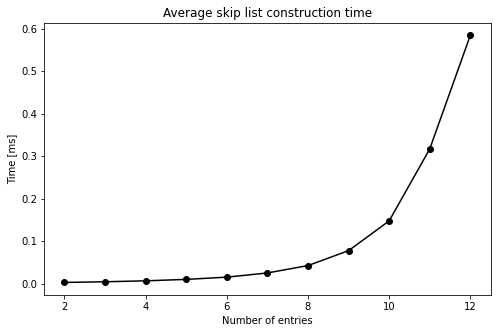

In [5]:
plt.figure(figsize=(8, 5))
plt.title("Average skip list construction time")
plt.plot(df1['e'], df1['avg construction time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of entries")
plt.savefig("test_skip.png", dpi=170, format='png', bbox_inches='tight')

\begin{tabular}{rrrrr}
\toprule
   f &  avg query time &  avg verif time &  returned &  matching \\
\midrule
 0.1 &           3.482 &          14.446 &   20000.0 &   10000.0 \\
 0.2 &           4.055 &          21.281 &   30000.0 &   20000.0 \\
 0.3 &           5.094 &          29.731 &   40000.0 &   30000.0 \\
 0.4 &           7.095 &          42.773 &   60000.0 &   40000.0 \\
 0.5 &           5.198 &          40.733 &   60000.0 &   50000.0 \\
 0.6 &           5.978 &          57.657 &   70000.0 &   60000.0 \\
 0.7 &           5.996 &          59.703 &   80000.0 &   70000.0 \\
 0.8 &           6.322 &          63.450 &   90000.0 &   80000.0 \\
 0.9 &           7.436 &          66.849 &  100000.0 &   90000.0 \\
\bottomrule
\end{tabular}



In [ ]:
plt.figure(figsize=(8, 5))
#plt.title("MR-tree index construction time (n = 10000)")
#plt.plot(res['n'], res['mat_time'], color='gray', label='Matlab')
plt.plot(df1['c'], df1['time'], color='black')
plt.ylabel("Time [ms]")
plt.xlabel("c")
#plt.plot([x for x in range(100, 100000)], [x*np.log(x) for x in range(100, 100000)], color='black', linestyle='--')
#plt.legend()
plt.savefig("test_construction_capacity.png", dpi=170, format='png', bbox_inches='tight')